In [ ]:
!pip install mne
import matplotlib.pyplot as plt
import os
import mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.1 MB/s eta 0:00:00


In [ ]:
data_folder = mne.datasets.sample.data_path()
path = os.path.join(data_folder, "MEG", "sample",  "sample_audvis_raw.fif")
raw = mne.io.read_raw_fif(path)
print("_______________________________")
print(raw.info)
print("_______________________________")
raw_meg = raw.pick(['meg'])
print(f"The datasets bad channels are - >{raw_meg.info['bads']}")

Using default location ~/mne_data for sample...
Creating /root/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.70TB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 02m14s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
_______________________________
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 

All the MEG signals in the dataset plotted within 1 graph


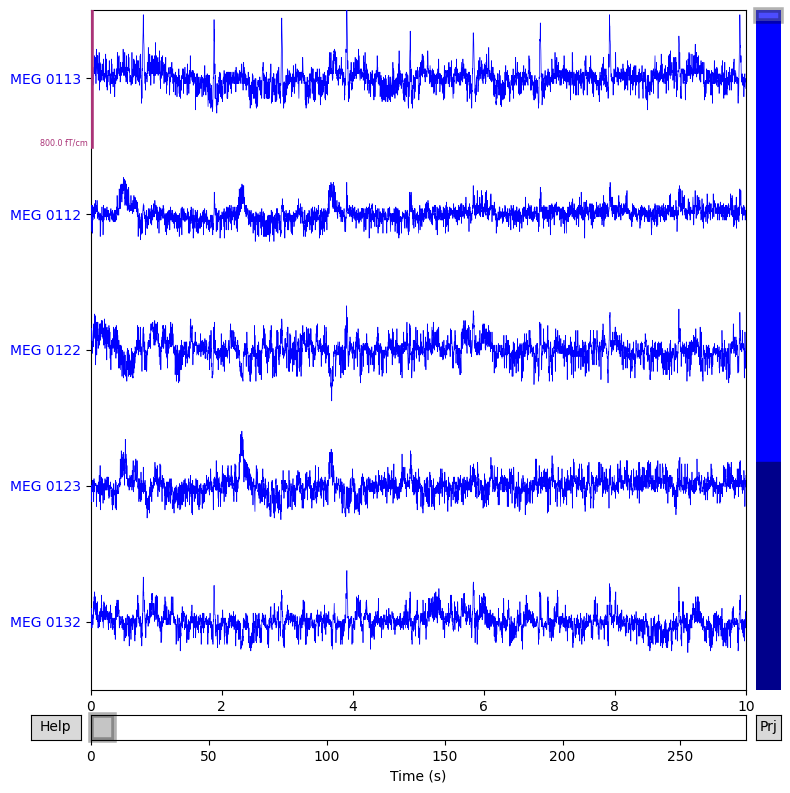

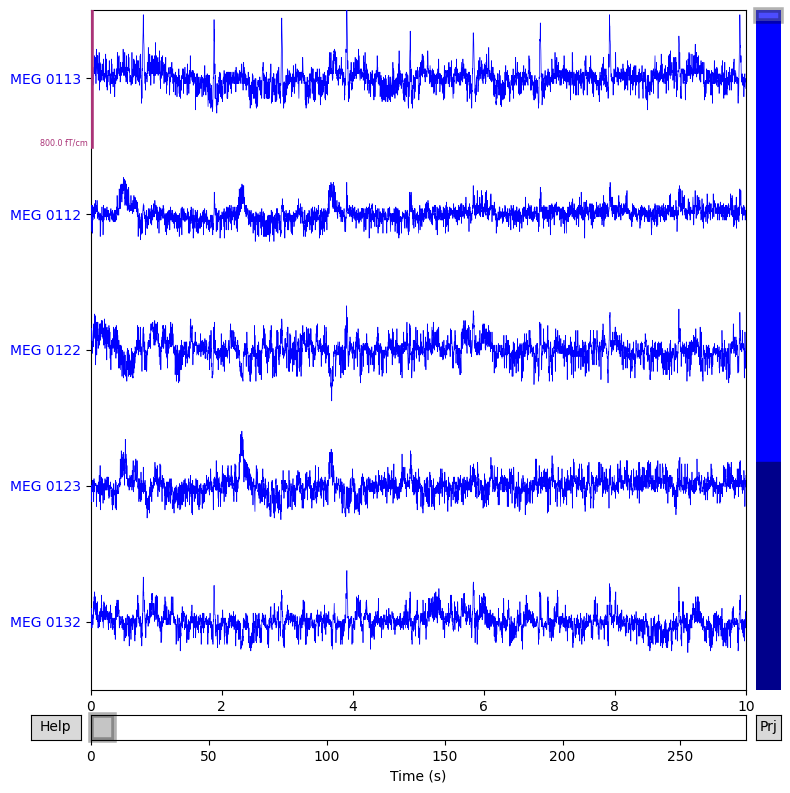

In [ ]:
raw_meg = raw_meg.drop_channels(raw_meg.info["bads"])
print("All the MEG signals in the dataset plotted within 1 graph")
raw_meg.plot(duration=10, n_channels=5)

A single isolated channel, with start time - 10 and stop time - 12


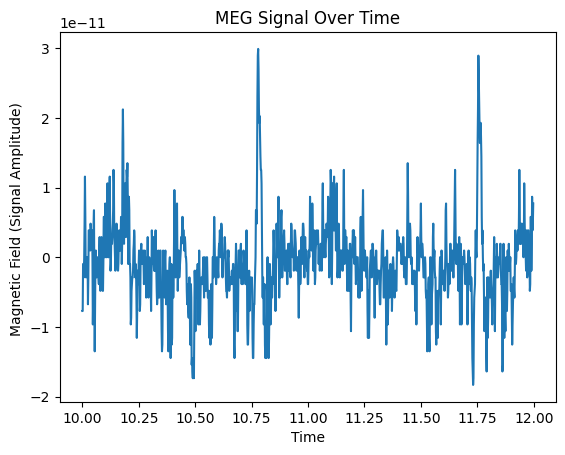

In [ ]:
sfreq = raw_meg.info['sfreq']
start, stop = int(10 * sfreq), int(12 *sfreq)
oneechan = raw_meg[0]
x = raw_meg[0][1][start:stop]
y = raw_meg[0][0].T[start:stop]
print("A single isolated channel, with start time - 10 and stop time - 12")
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Magnetic Field (Signal Amplitude) ")
plt.title("MEG Signal Over Time")
plt.show()